## Brute Force Attack Analysis - Standarized Vaults

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from pylab import *
import itertools
from sklearn.metrics import confusion_matrix
from PlotUtils import *
import pathlib
import scipy.io

# Para cambiar el mapa de color por defecto
plt.rcParams["image.cmap"] = "Set2"
# Para cambiar el ciclo de color por defecto en Matplotlib
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
# plt.rcParams["axes.prop_cycle"] =  plt.cycler('color', ['#8C6D31', '#ffdd6b', '#e9e2c9', '#dcae52', '#af7132', '#8C9363', '#637939', '#AD494A', '#E7969C', '#C4CBB9'])
# plt.rcParams["axes.prop_cycle"] =  plt.cycler('color', ['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9'])
# plt.rcParams["axes.prop_cycle"] =  plt.cycler('color', ['#084081', '#0868ac', '#2b8cbe', '#4eb3d3', '#7bccc4', '#a8ddb5', '#ccebc5', '#e0f3db', '#f7fcf0'])
# plt.rcParams["axes.prop_cycle"] =  plt.cycler('color', ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac','#053061'])
# plt.rcParams["axes.prop_cycle"] =  plt.cycler('color', ['#67001f', '#053061', '#b2182b', '#2166ac', '#d6604d', '#4393c3', '#f4a582', '#92c5de', '#fddbc7','#d1e5f0'])
plt.rcParams["axes.prop_cycle"] =  plt.cycler('color', ['#67001f', '#053061', '#b2182b', '#2166ac', '#d6604d', '#4393c3', '#f4a582', '#92c5de', '#fddbc7','#d1e5f0'][::-1])
# plt.rcParams["axes.prop_cycle"] =  plt.cycler('color', ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9','#bc80bd','#ccebc5','#ffed6f'])
# plt.rcParams["axes.prop_cycle"] =  plt.cycler('color', ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9','#bc80bd','#ccebc5','#ffed6f'][::-1])

In [34]:
bf = pd.read_excel('ExpOctubre/StatisticsBruteForce/ResultsComplete_17-10-21.xlsx', engine='openpyxl')
bf[48:]

,Vault,Iteraciones,Tiempo (s)
48,Vault107_1,26040,30.210
49,Vault107_2,482439,596.360
50,Vault107_3,26476,32.509
51,Vault107_4,97613,116.191
52,Vault107_5,337222,428.915
53,Vault107_6,140580,172.299
54,Vault107_7,45277,52.669
55,Vault107_8,141208,166.751
56,Vault108_1,152120,177.586
57,Vault108_2,153512,1227.008


In [3]:
help(groupedBarPlot)

Help on function groupedBarPlot in module PlotUtils:

groupedBarPlot(data, xticks, title, legend=True, axislabels=False, width=0.35, figsize=(25, 10), png=False, pdf=False, colors=None, lg=False, fsizes=False, adBL=False, xtick_rot=False, axisLim=False)
    Width recomendado para 2 barras agrupadas es 0.35, para 3 y 4 es 0.2



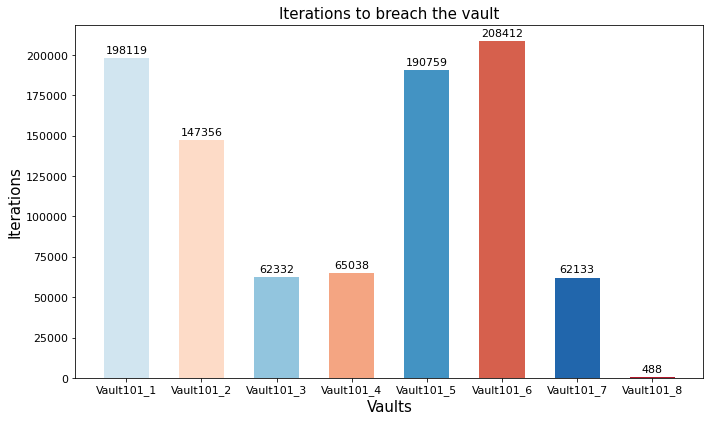

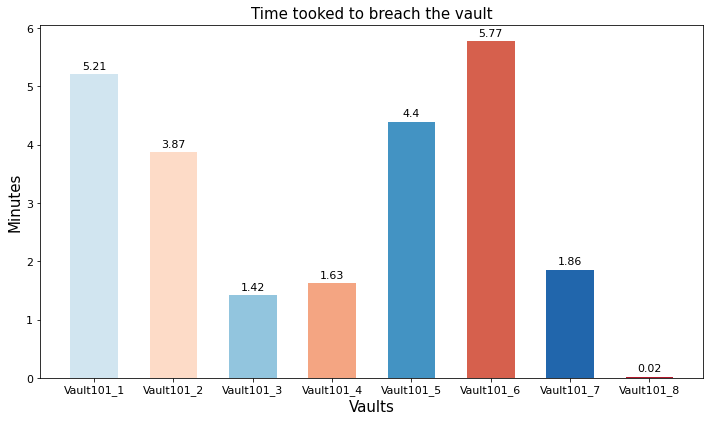

In [4]:
g1 = bf[:8]
groupedBarPlot({'IpV':g1['Iteraciones']}, g1['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g1['Tiempo (s)']/60}, g1['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

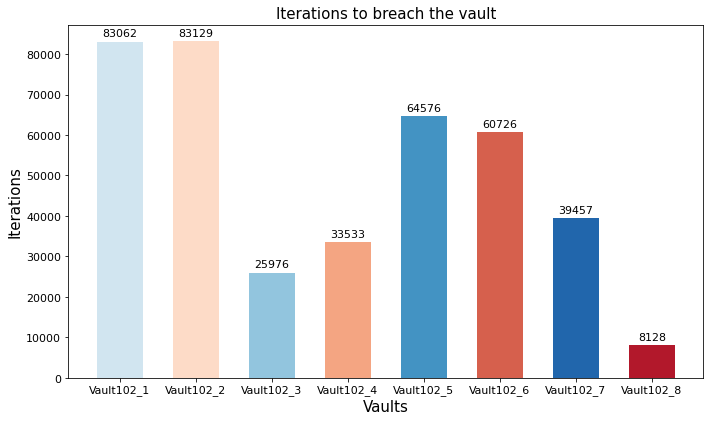

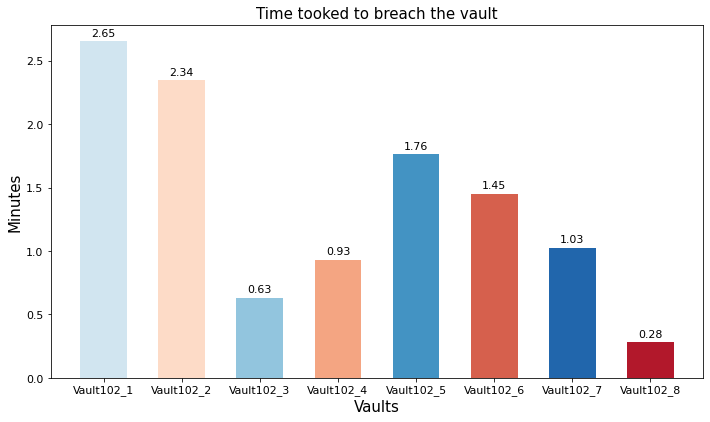

In [5]:
g2 = bf[8:16]
groupedBarPlot({'IpV':g2['Iteraciones']}, g2['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g2['Tiempo (s)']/60}, g2['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

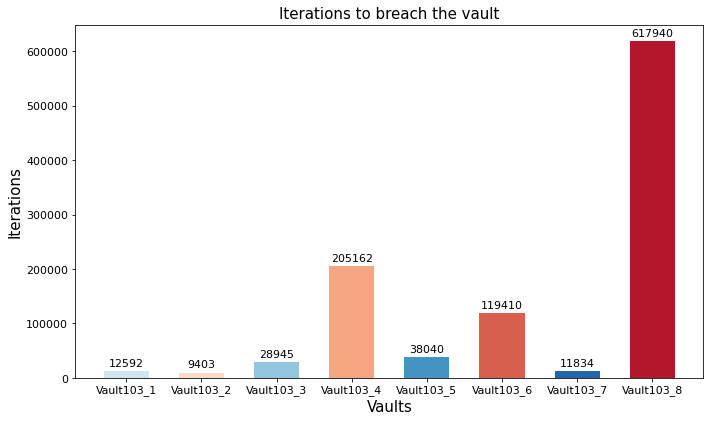

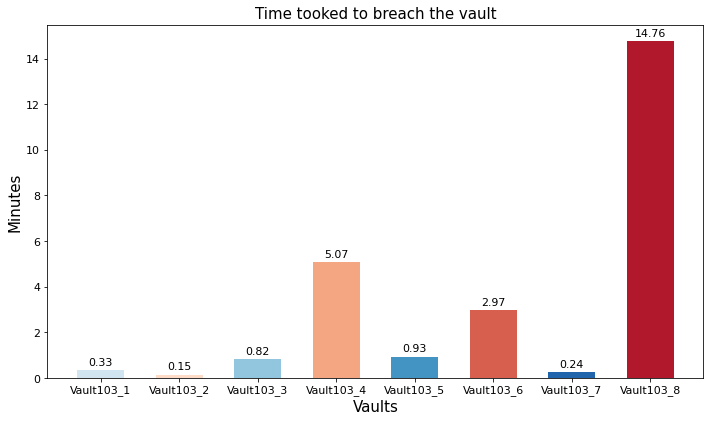

In [6]:
g3 = bf[16:24]
groupedBarPlot({'IpV':g3['Iteraciones']}, g3['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g3['Tiempo (s)']/60}, g3['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), adBL = 2, width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

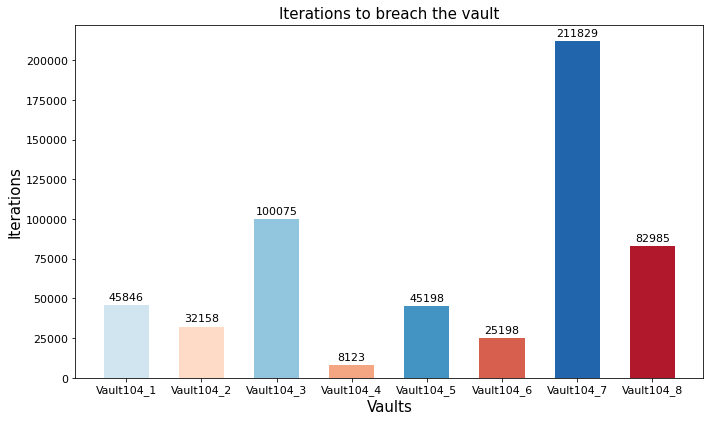

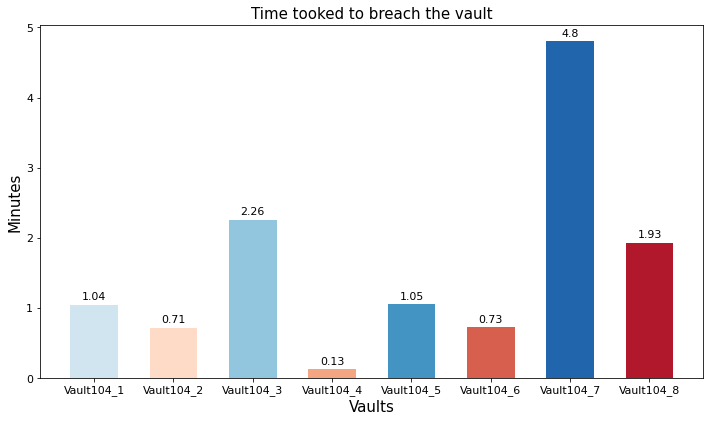

In [7]:
g4 = bf[24:32]
groupedBarPlot({'IpV':g4['Iteraciones']}, g4['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g4['Tiempo (s)']/60}, g4['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

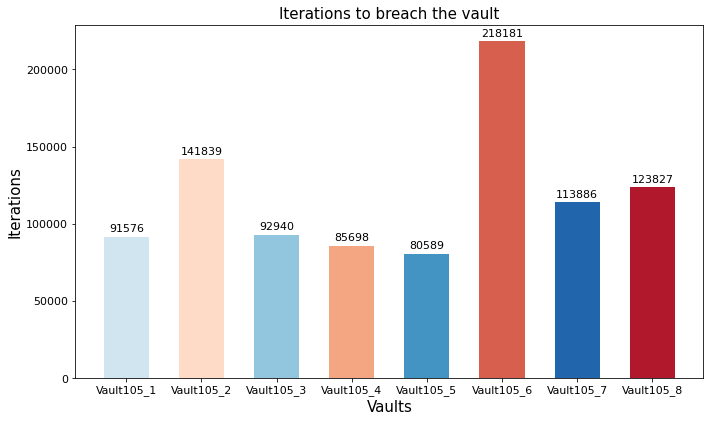

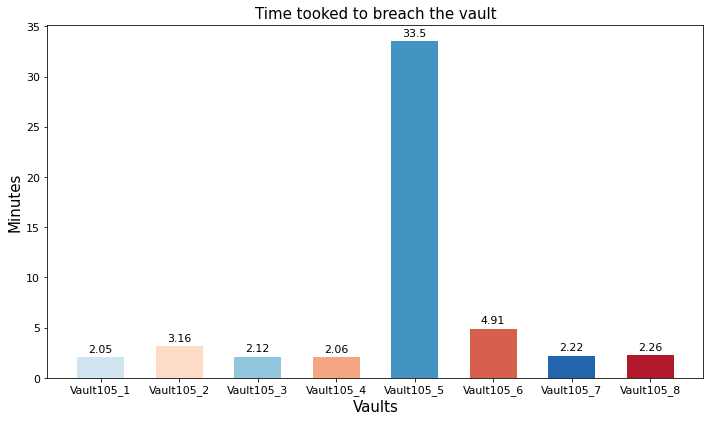

In [8]:
g5 = bf[32:40]
groupedBarPlot({'IpV':g5['Iteraciones']}, g5['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g5['Tiempo (s)']/60}, g5['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

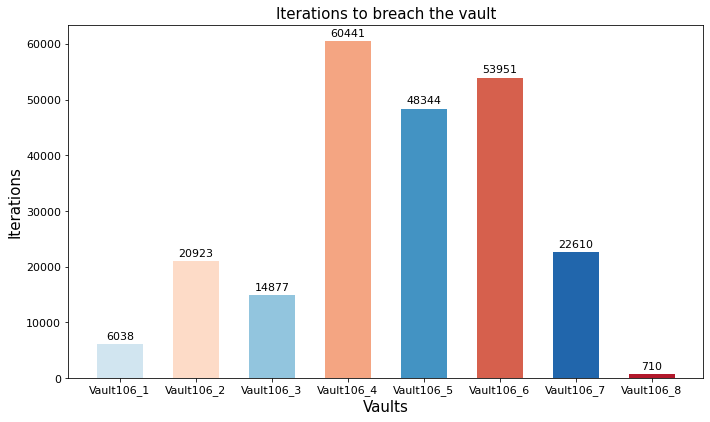

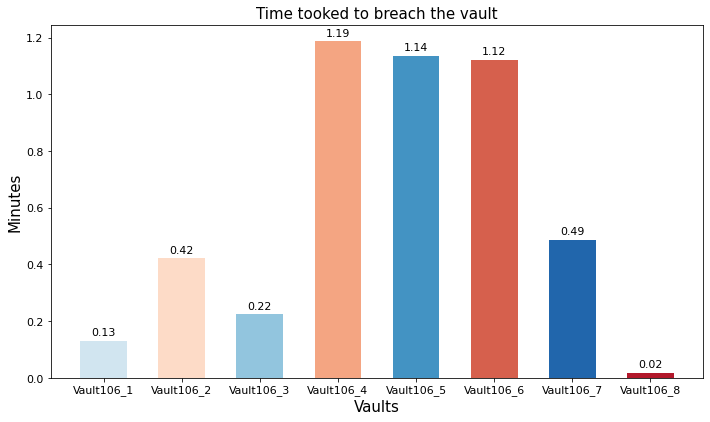

In [9]:
g6 = bf[40:48]
groupedBarPlot({'IpV':g6['Iteraciones']}, g6['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g6['Tiempo (s)']/60}, g6['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

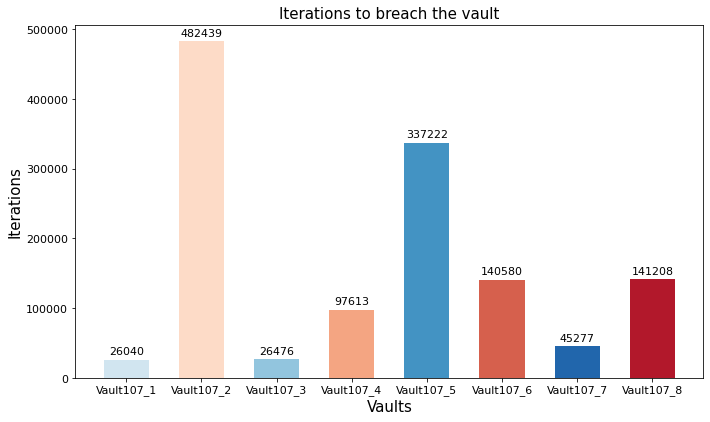

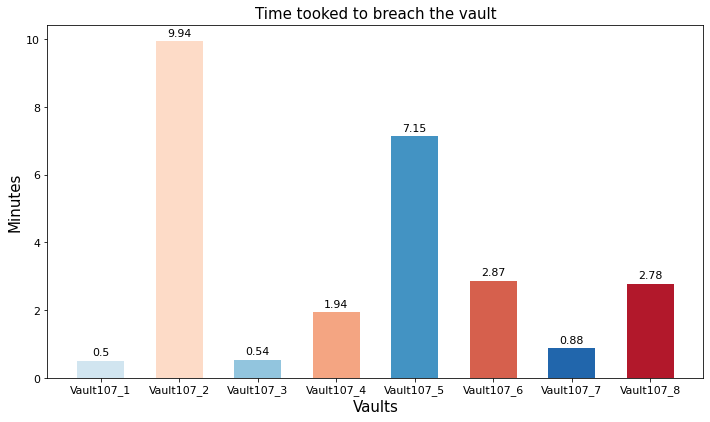

In [35]:
g7 = bf[48:56]
groupedBarPlot({'IpV':g7['Iteraciones']}, g7['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g7['Tiempo (s)']/60}, g7['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2,fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

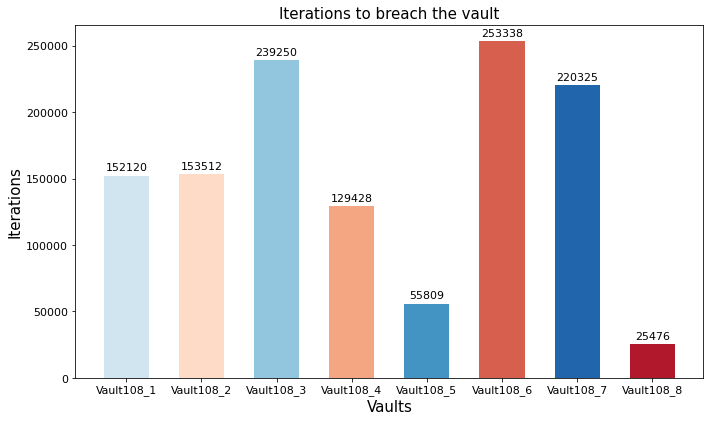

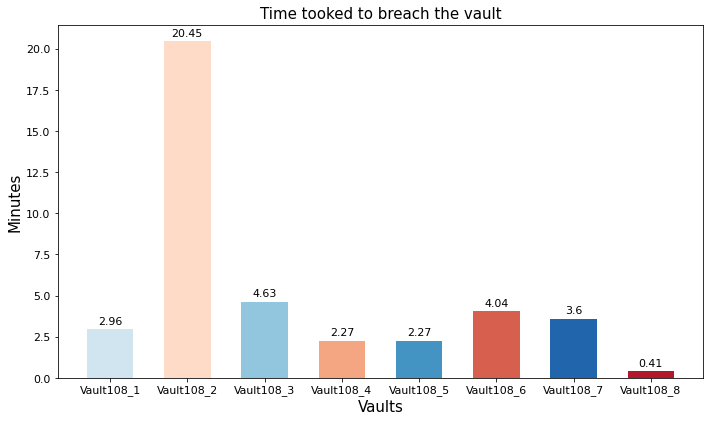

In [11]:
g8 = bf[56:64]
groupedBarPlot({'IpV':g8['Iteraciones']}, g8['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g8['Tiempo (s)']/60}, g8['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

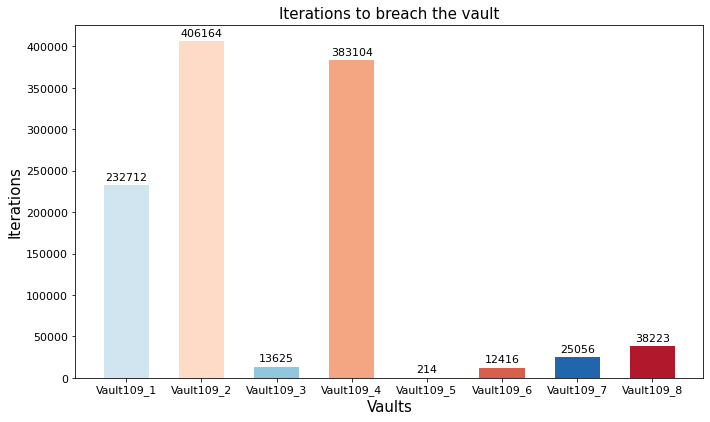

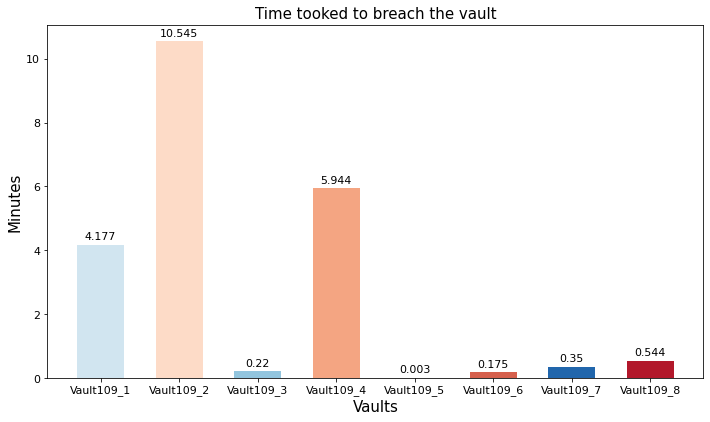

In [12]:
g9 = bf[64:72]
groupedBarPlot({'IpV':g9['Iteraciones']}, g9['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g9['Tiempo (s)']/60}, g9['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 3, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

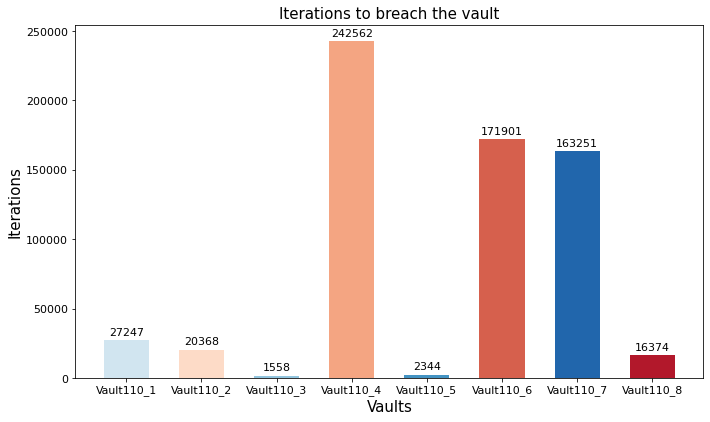

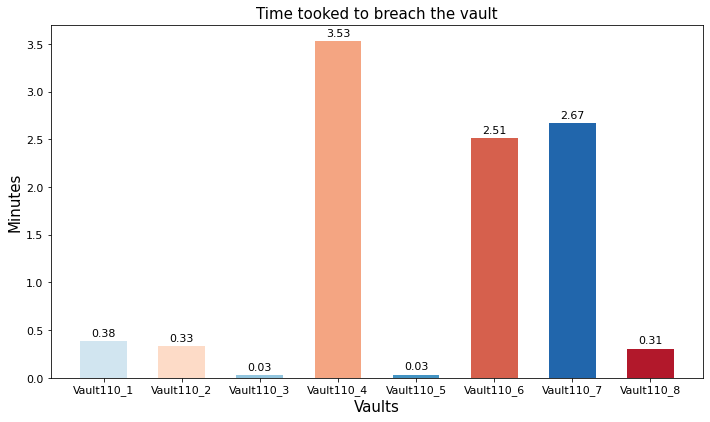

In [13]:
g10 = bf[72:80]
groupedBarPlot({'IpV':g10['Iteraciones']}, g10['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g10['Tiempo (s)']/60}, g10['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

In [14]:
NCV = pd.read_csv('ExpOctubre/CiphVaultsBFStats/VaultsCiphResultsComplete_26-10-21.csv')
NCV2 = NCV[NCV['Count'] != 0]
NCV

,Vaults,Count,Total Combinations,Mean Combinations
0,Vault101_1,8,0.000000e+00,0.000000e+00
1,Vault101_2,0,0.000000e+00,0.000000e+00
2,Vault101_3,0,0.000000e+00,0.000000e+00
3,Vault101_4,0,0.000000e+00,0.000000e+00
4,Vault101_5,9,4.963466e+24,4.963466e+24
...,...,...,...,...
75,Vault110_4,0,0.000000e+00,0.000000e+00
76,Vault110_5,0,0.000000e+00,0.000000e+00
77,Vault110_6,0,0.000000e+00,0.000000e+00
78,Vault110_7,0,0.000000e+00,0.000000e+00


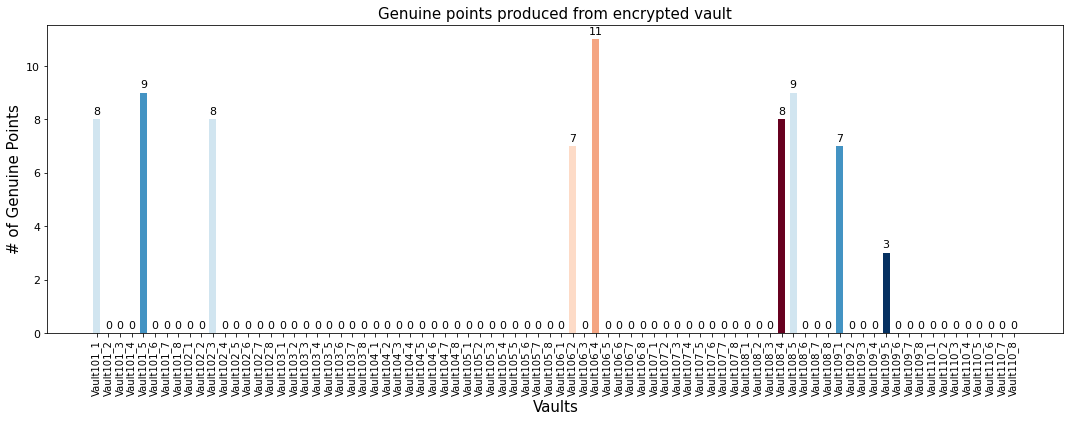

In [15]:
groupedBarPlot({'IpV':NCV['Count']}, NCV['Vaults'],'Genuine points produced from encrypted vault', axislabels = ['Vaults','# of Genuine Points'], figsize = (15,6), width= 0.6, legend = False, xtick_rot = 90, fsizes={'axes':15,'xtick':10, 'ytick':11, 'font':11})

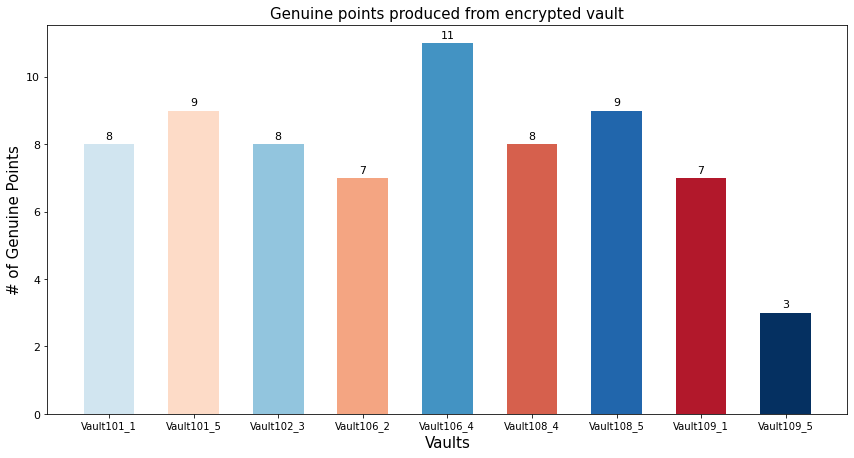

In [16]:
groupedBarPlot({'IpV':NCV2['Count']}, NCV2['Vaults'],'Genuine points produced from encrypted vault', axislabels = ['Vaults','# of Genuine Points'], figsize = (12,6.5), width= 0.6, legend = False, xtick_rot = 0, fsizes={'axes':15,'xtick':10, 'ytick':11, 'font':11})

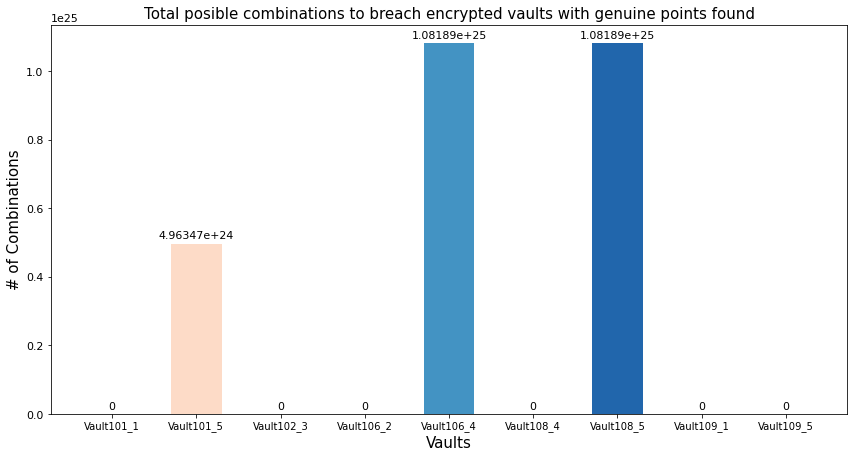

In [17]:
groupedBarPlot({'IpV':NCV2['Total Combinations']}, NCV2['Vaults'],'Total posible combinations to breach encrypted vaults with genuine points found', axislabels = ['Vaults','# of Combinations'], figsize = (12,6.5), width= 0.6, legend = False, xtick_rot = 0, fsizes={'axes':15,'xtick':10, 'ytick':11, 'font':11})

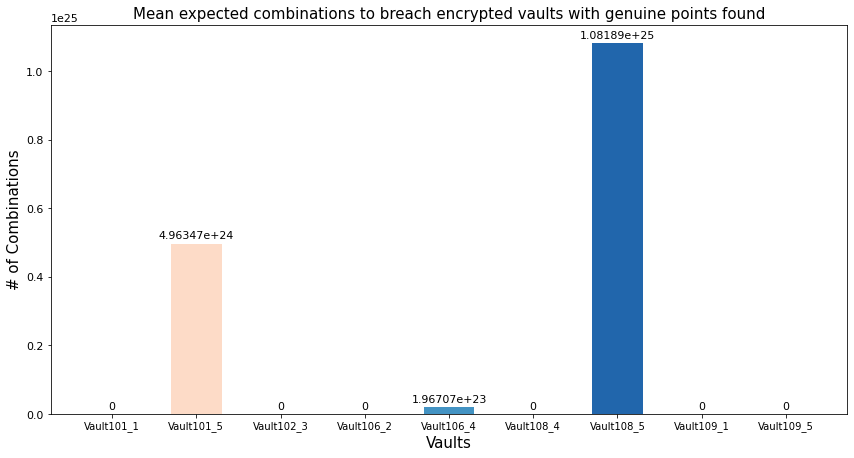

In [18]:
groupedBarPlot({'IpV':NCV2['Mean Combinations']}, NCV2['Vaults'],'Mean expected combinations to breach encrypted vaults with genuine points found', axislabels = ['Vaults','# of Combinations'], figsize = (12,6.5), width= 0.6, legend = False, xtick_rot = 0, fsizes={'axes':15,'xtick':10, 'ytick':11, 'font':11})

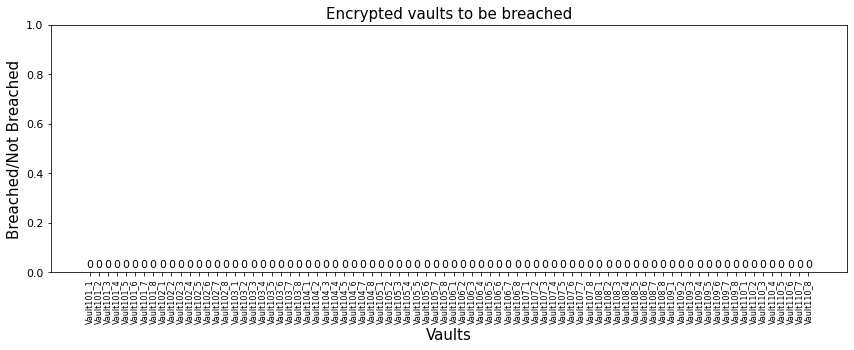

In [19]:
brokenvaults = [0 for i in NCV['Count'] if i < (8+1)*2]
groupedBarPlot({'IpV':brokenvaults}, NCV['Vaults'],'Encrypted vaults to be breached', axislabels = ['Vaults','Breached/Not Breached'], figsize = (12,5), width= 0.6, legend = False, xtick_rot = 90, axisLim = {'ylim':[0,1]}, fsizes={'axes':15,'xtick':8, 'ytick':11, 'font':11})

## Brute Force Attack Analysis - Non-Standarized Vaults

In [20]:
bf = pd.read_excel('Pruebas/ResultsComplete_17-10-21.xlsx', engine='openpyxl')
bf

,Vault,Iteraciones,Tiempo (s)
0,Vault101_1,637964,572.858
1,Vault101_2,27540584512,0.000
2,Vault101_3,42757703560,0.000
3,Vault101_4,0,0.000
4,Vault101_5,0,0.000
...,...,...,...
75,Vault110_4,23667689815,0.000
76,Vault110_5,22913,41.985
77,Vault110_6,166215,283.123
78,Vault110_7,4029,6.900


In [21]:
bfNC = bf[bf['Iteraciones'] != 0]
bfNC2 = bfNC[bfNC['Tiempo (s)'] != 0].reset_index().drop('index', 1)
bfNC2

C:\Users\mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Vault,Iteraciones,Tiempo (s)
0,Vault101_1,637964,572.858
1,Vault101_6,7613,7.893
2,Vault101_7,79617,79.569
3,Vault102_1,54486,65.146
4,Vault102_2,462515,545.372
5,Vault102_6,65509,79.165
6,Vault103_1,517,0.657
7,Vault103_5,18923,20.582
8,Vault103_6,655593,718.737
9,Vault103_7,151288,164.479


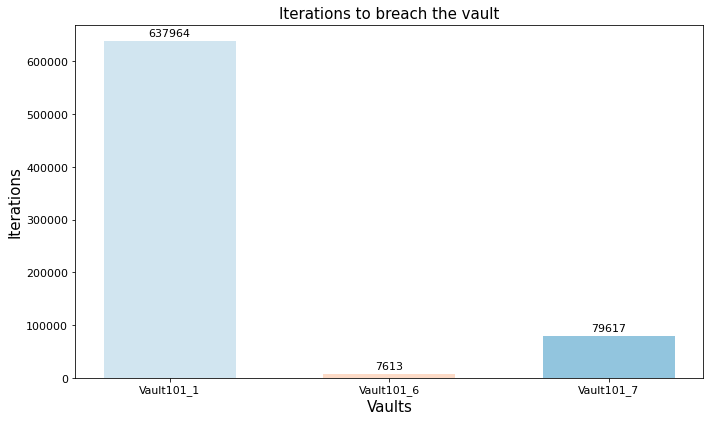

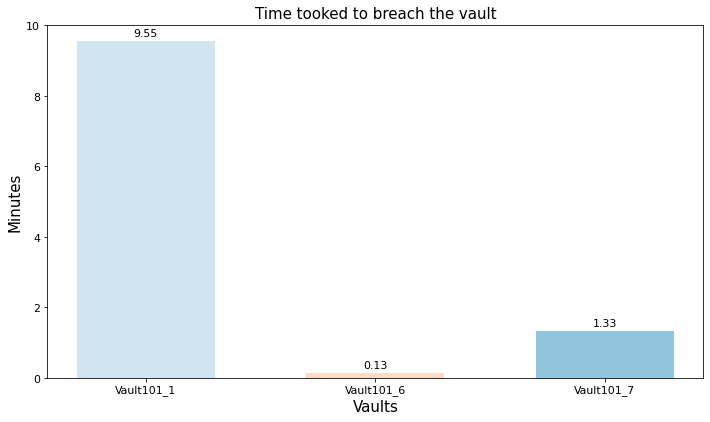

In [22]:
g1 = bfNC2[:3]
groupedBarPlot({'IpV':g1['Iteraciones']}, g1['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g1['Tiempo (s)']/60}, g1['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

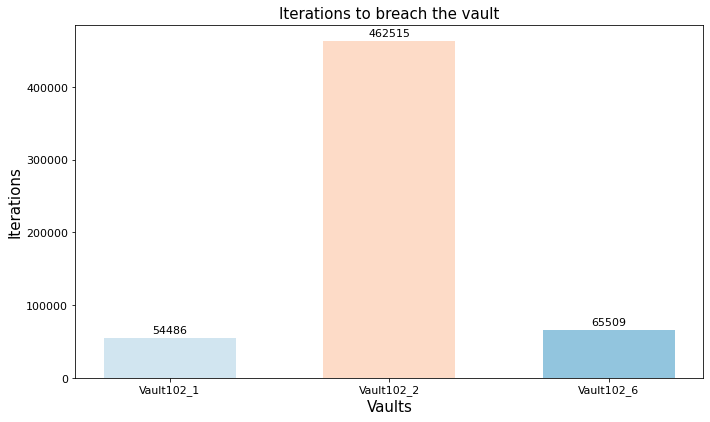

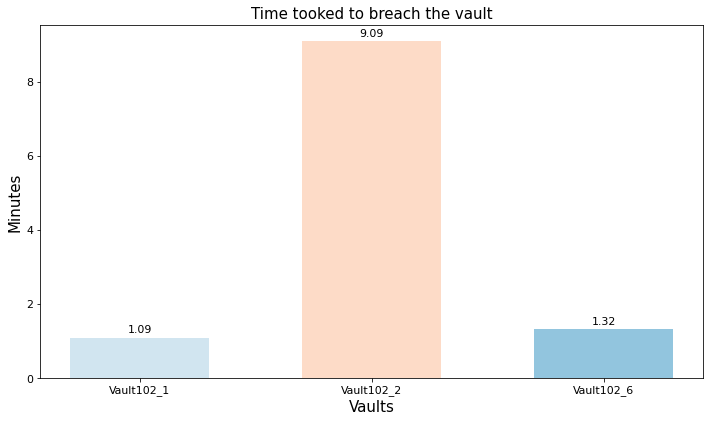

In [23]:
g2 = bfNC2[3:6]
groupedBarPlot({'IpV':g2['Iteraciones']}, g2['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g2['Tiempo (s)']/60}, g2['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

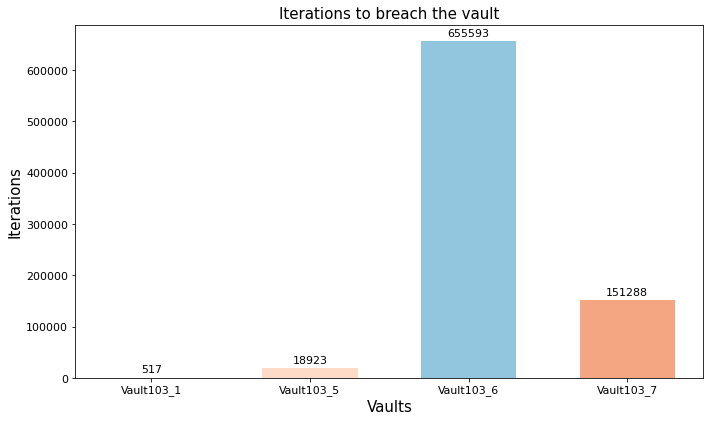

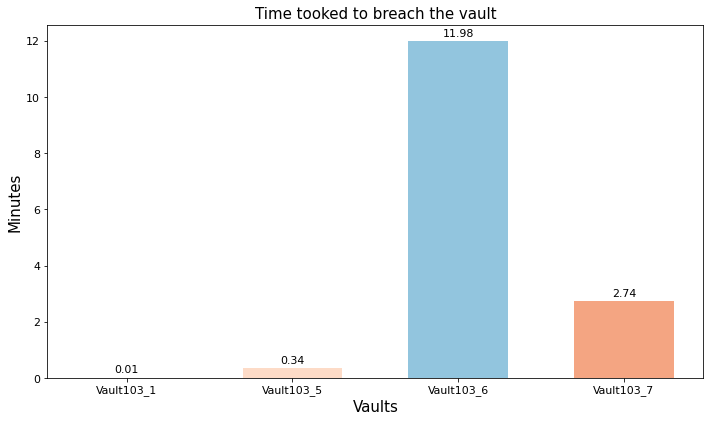

In [24]:
g3 = bfNC2[6:10]
groupedBarPlot({'IpV':g3['Iteraciones']}, g3['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g3['Tiempo (s)']/60}, g3['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

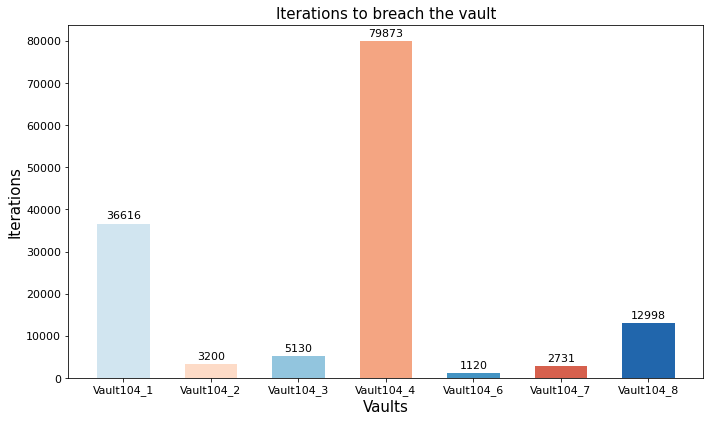

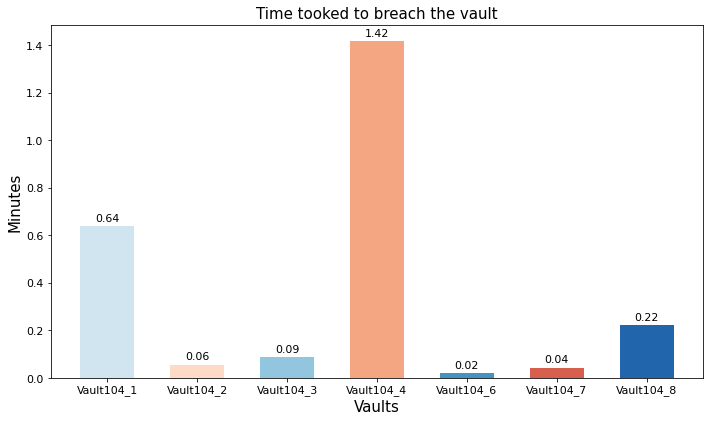

In [25]:
g4 = bfNC2[10:17]
groupedBarPlot({'IpV':g4['Iteraciones']}, g4['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g4['Tiempo (s)']/60}, g4['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

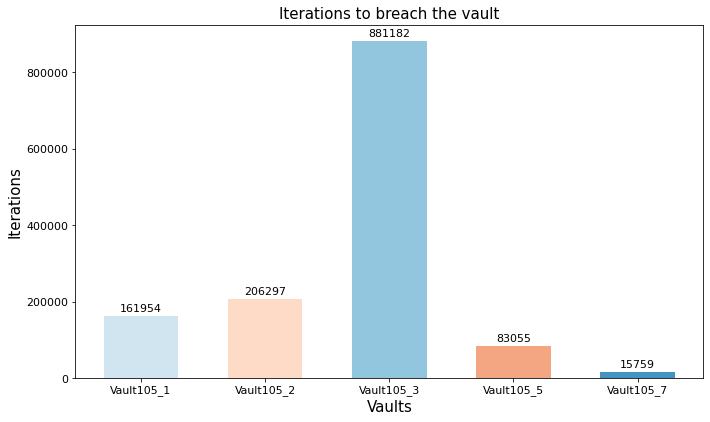

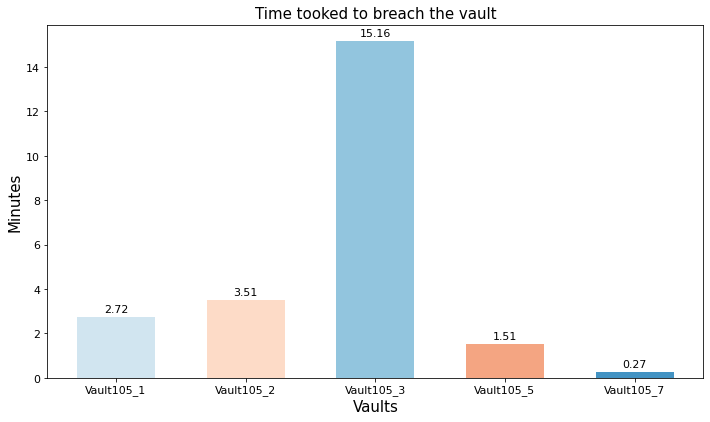

In [26]:
g5 = bfNC2[17:22]
groupedBarPlot({'IpV':g5['Iteraciones']}, g5['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g5['Tiempo (s)']/60}, g5['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

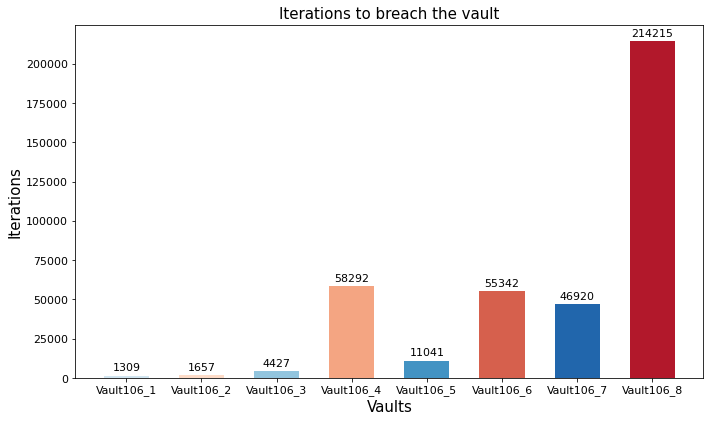

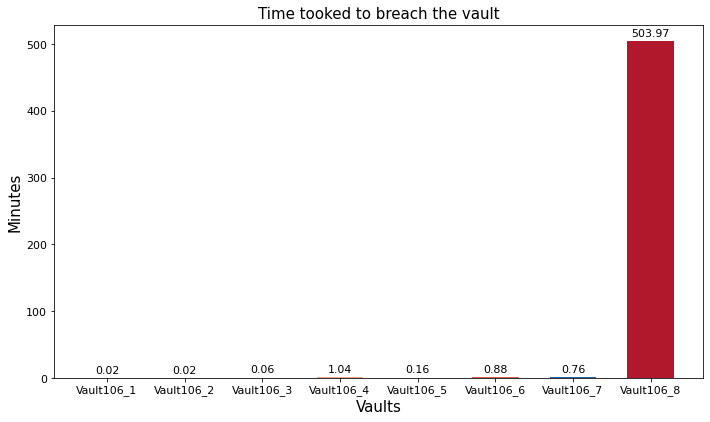

In [27]:
g6 = bfNC2[22:30]
groupedBarPlot({'IpV':g6['Iteraciones']}, g6['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g6['Tiempo (s)']/60}, g6['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

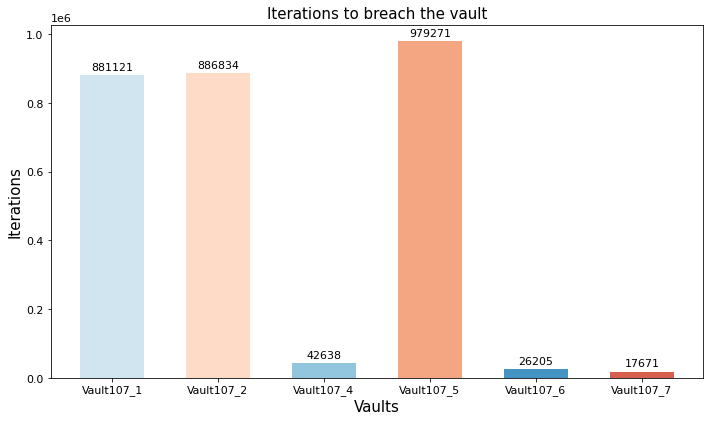

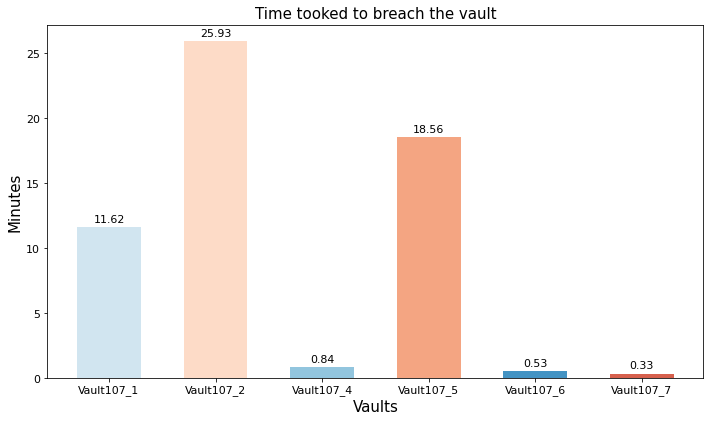

In [28]:
g7 = bfNC2[30:36]
groupedBarPlot({'IpV':g7['Iteraciones']}, g7['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g7['Tiempo (s)']/60}, g7['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

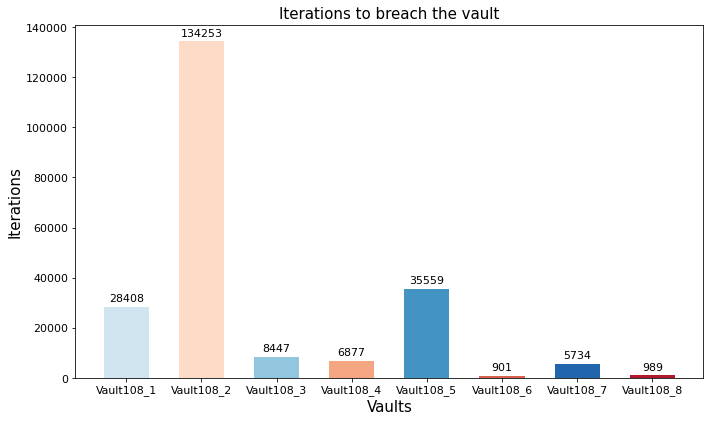

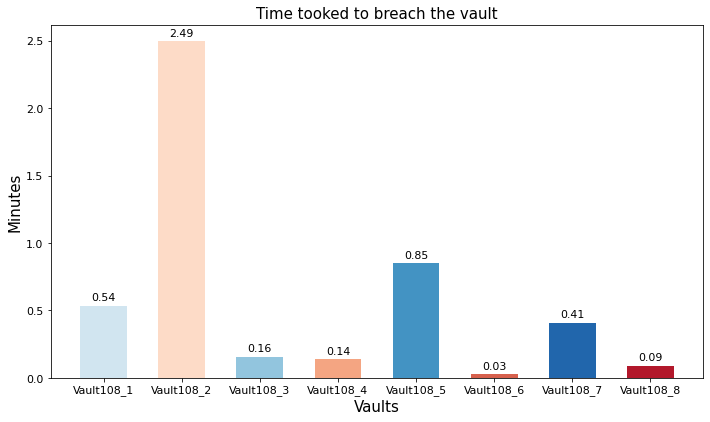

In [29]:
g8 = bfNC2[36:44]
groupedBarPlot({'IpV':g8['Iteraciones']}, g8['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g8['Tiempo (s)']/60}, g8['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

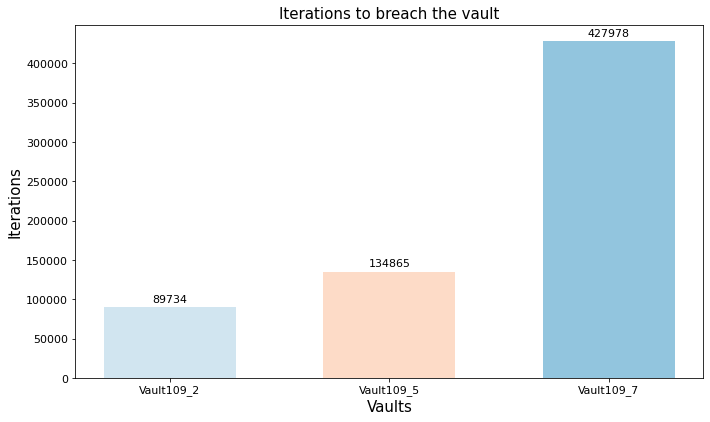

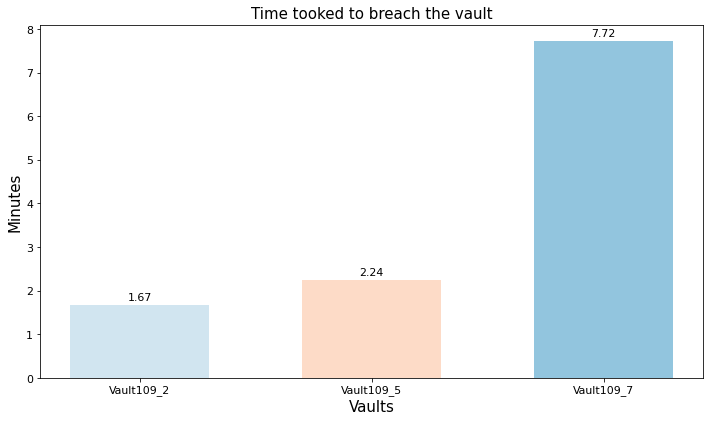

In [30]:
g9 = bfNC2[44:47]
groupedBarPlot({'IpV':g9['Iteraciones']}, g9['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g9['Tiempo (s)']/60}, g9['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

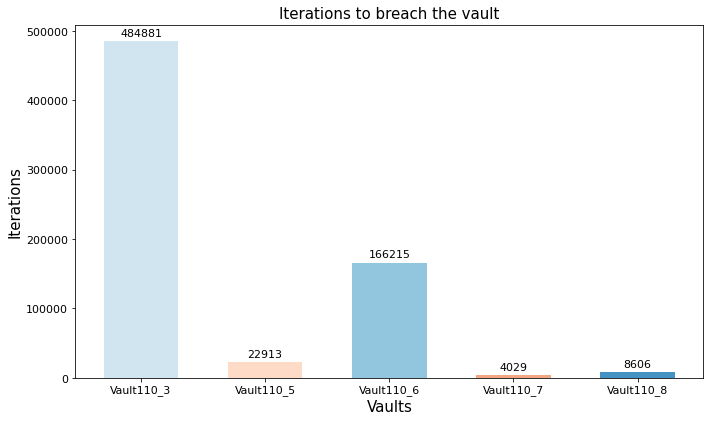

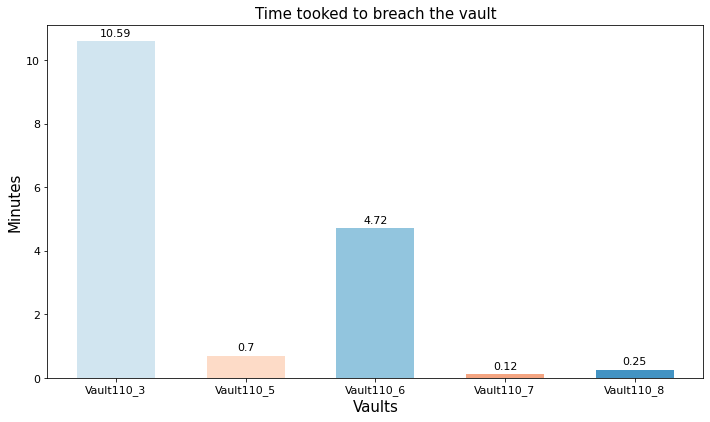

In [31]:
g10 = bfNC2[47:]
groupedBarPlot({'IpV':g10['Iteraciones']}, g10['Vault'],'Iterations to breach the vault', axislabels = ['Vaults','Iterations'], figsize = (10,6), width= 0.6, legend = False, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})
groupedBarPlot({'TpV':g10['Tiempo (s)']/60}, g10['Vault'],'Time tooked to breach the vault', axislabels = ['Vaults', 'Minutes'], figsize = (10,6), width= 0.6, legend = False, adBL = 2, fsizes={'axes':15,'xtick':11, 'ytick':11, 'font':11})

In [32]:
bfNGP = list(bf[bf['Iteraciones'] == 0]['Vault'])
print('Vaults without enough points to calculate Lagrange interpolation:\n',bfNGP)
print('\n\n')

bfI = bf[bf['Tiempo (s)'] == 0]
bfI = list(bfI[bfI['Iteraciones'] != 0]['Vault'])
print('Vaults that take more than 1 million of iterations to be broken:\n',bfI)

Vaults without enough points to calculate Lagrange interpolation:
 ['Vault101_4', 'Vault101_5', 'Vault102_5', 'Vault102_8', 'Vault107_8', 'Vault109_6']



Vaults that take more than 1 million of iterations to be broken:
 ['Vault101_2', 'Vault101_3', 'Vault101_8', 'Vault102_3', 'Vault102_4', 'Vault102_7', 'Vault103_2', 'Vault103_3', 'Vault103_4', 'Vault103_8', 'Vault104_5', 'Vault105_4', 'Vault105_6', 'Vault105_8', 'Vault107_3', 'Vault109_1', 'Vault109_3', 'Vault109_4', 'Vault109_8', 'Vault110_1', 'Vault110_2', 'Vault110_4']
